In [2]:
import cv2
import matplotlib.pyplot as plt
from copy import copy

In [3]:
image = cv2.imread('karenina.jpg')
image.shape

(639, 960, 3)

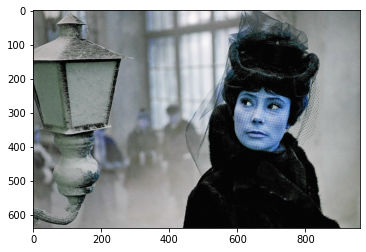

In [4]:
plt.imshow(image)

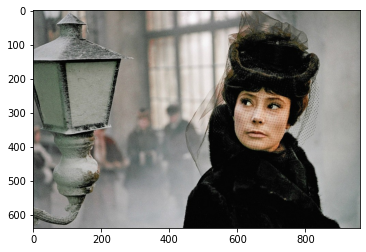

In [5]:
'''Видно, что у нас на предыдущей картинке проблема с 
цветопередачей скорее всего, цвета хакодированы в другом порядке'''

rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

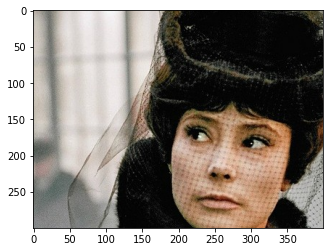

In [6]:
cropped = rgb[100:400,400:800]
plt.imshow(cropped)

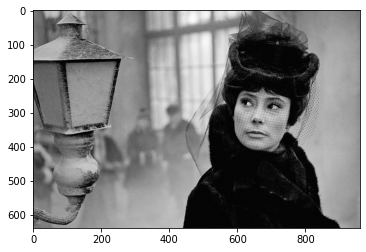

In [7]:
'''Проблема перевода в серые тона в матплотлибе - 
из-за разных цветовых карт получается зеленое изображение, 
поэтому надо добавлять, по какой именно цветовой карте это делать'''

gray_image = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, 'gray')

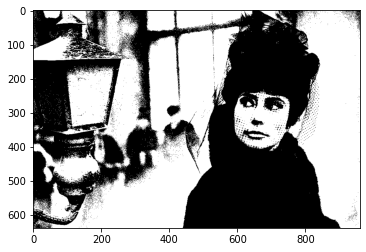

In [8]:
'''Проблема перевода в чб - на вход приходится давать не 
цветное изображение, а сразу серое'''

ret, threshold_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(threshold_image, 'gray')

### Создадим ряд функций:
* image_rgb -> переводит картинку в rgb
* image_gray -> переводит картинку в серый цвет
* classificator -> вызывает тот или иной алгоритм вычленения объекта
* detect_faces -> детектит лица

In [9]:
'''Пусть будет конвертирующая цвет функция'''

def image_rgb(path):
    image = cv2.imread(path)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return rgb

In [10]:
'''Функция для конвертации в серый'''

def image_gray(path):
    image = cv2.imread(path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image #, plt.imshow(gray_image, 'gray')

In [11]:
'''Вот тут вот в классификатор засовывается xml,
в котором, как я понимаю, прописано, как именно
детектить лица (можно детектить что угодно, 
надо только нужный xml иметь)'''

def classificator(name):
    cascade = cv2.CascadeClassifier(name)
    return cascade

In [12]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [54]:
def detect_faces(cascade, image, scaleFactor = 1.1): 
    '''
    :scaleFactor: то, во сколько раз мы уменьшаем наше окно поиска лиц или чего-либо еще при каждой итерации
    '''
    
    '''на всякий случай поработаем с копией'''
    image_copy = image.copy()

    '''копию картинки переводим в серый, потому что detectMultiScale
       берет на фход только серые изображения'''
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    '''Детектим лица с помощью haar classifier''' 
    faces = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)
    
    print("Лиц обнаружено: " + format(len(faces)))

    for (x, y, w, h) in faces:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 3)

    return image_copy

### Потестим наши функции

In [40]:
image_1 = image_rgb('karenina.jpg')
image_2 = image_rgb('annakarenina_1967.jpg')
image_3 = image_rgb('karkar.jpg')

In [41]:
frontal_face_cascade = classificator('haarcascade_frontalface_default.xml')
profile_face_cascade = classificator('haarcascade_profileface.xml')

Лиц обнаружено: 5


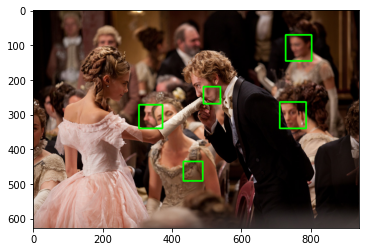

In [69]:
'''вот на этом примере видно, что не так уж хорошо OpenCV 
   распознает лица, даже несколько обидно - тут надо мудрить с параметром scaleFactor или еще чем-нибудь'''
faces = detect_faces(profile_face_cascade, image_3, 1.03)
plt.imshow(faces)

### Работа с цветом картинок (https://www.youtube.com/watch?v=F9TZb0XBow0&list=PLS1QulWo1RIa7D1O6skqDQ-JZ1GGHKK-K&index=30)

In [57]:
def image_hist(image):
    '''Разделяем изображение на значения b,g,r. 
    Интересно, что при визуализации этих переменных с помощью cv2.imshow() 
    мы получим три серых картинки с разной интенсивностью и четкостью
    '''
    b, g, r = cv2.split(image) 
    '''
    Теперь визуализируем
    '''
    plt.hist(b.ravel(), 256, [0, 256])
    plt.hist(g.ravel(), 256, [0, 256])
    plt.hist(r.ravel(), 256, [0, 256])
    plt.show()
    '''
    Есть еще второй способ визуализации, чисто предложенный CV2. В качестве аргументов функции подаются:
    изображение, цветовые каналы (ноль для серого, единица для цветного), маска (типа как мы можем изменить нашу картинку
    с т.з. значения пикселей), количество Bins, range (минимальное и максимальное значение пикселя)
    '''
    hist = cv2.calcHist([image], [1], None, [256], [0, 256])
    plt.plot(hist)

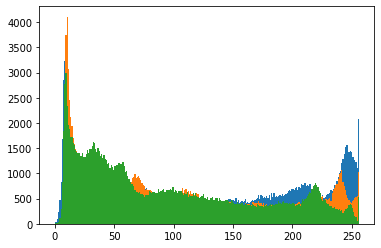

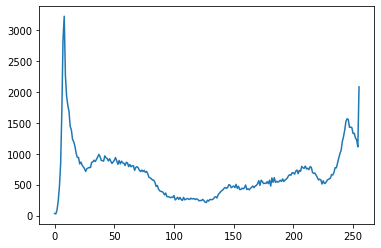

In [58]:
'''
    По оси Х мы получаем нашу интенсивность пикселей по каналам B, G, R
    (всего там 256 делений - максимальное цветовое значение пискеля), 
    если б у нас была целиком черная картинка, то у нас получилась бы прямая и наша интенсивность была бы равна нулю.
    По оси Y вроде должно отражаться число пикселей.
    В общем, с помощью такой гистограммы мы видим распределение пикселей, которые имеют определенное значение
    в промежутке от нуля до 256
'''
color_hist(image_2)